In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import time

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print("tf version:", tf.__version__)
import warnings
warnings.filterwarnings('ignore')

tf version: 2.13.0


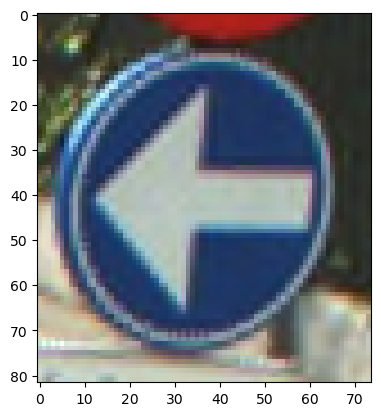

In [2]:
import matplotlib.pyplot as plt
img = load_img('./Belgium_Datasets/BelgiumTSC_Training/Training/00035/00020_00000.ppm')
plt.imshow(img)

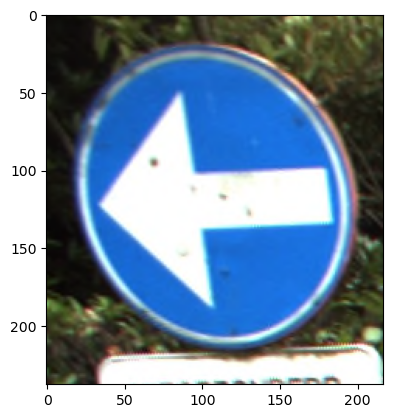

In [3]:
import matplotlib.pyplot as plt
img = load_img('./Belgium_Datasets/BelgiumTSC_Testing/Testing/00035/00151_00000.ppm')
plt.imshow(img)

In [4]:
directory='./Belgium_Datasets'
train_dir=directory+'/BelgiumTSC_Training/Training'
test_dir=directory+'/BelgiumTSC_Testing/Testing'
trainclasses=os.listdir(train_dir)
testclasses=os.listdir(test_dir)

In [5]:
df=[[]]
df=pd.DataFrame(df)
for i in trainclasses:
    path = "./Belgium_Datasets/BelgiumTSC_Training/Training/"+i+"/GT-"+i+".csv"
    df1 = pd.read_csv(path,sep=';')
    df1['Filename']="./Belgium_Datasets/BelgiumTSC_Training/Training/"+i+'/'+df1["Filename"]
    df=pd.concat([df,df1],ignore_index=True)

df['Rotate']=0
df["length"] = df["Roi.X2"]-df["Roi.X1"]
df["height"] = df["Roi.Y2"]-df["Roi.Y1"]
df=df.dropna()
df.head()

,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Rotate,length,height
1,./Belgium_Datasets/BelgiumTSC_Training/Trainin...,141.0,142.0,12.0,12.0,128.0,130.0,0.0,0,116.0,118.0
2,./Belgium_Datasets/BelgiumTSC_Training/Trainin...,120.0,123.0,10.0,10.0,109.0,113.0,0.0,0,99.0,103.0
3,./Belgium_Datasets/BelgiumTSC_Training/Trainin...,105.0,107.0,9.0,9.0,96.0,98.0,0.0,0,87.0,89.0
4,./Belgium_Datasets/BelgiumTSC_Training/Trainin...,94.0,105.0,8.0,9.0,86.0,95.0,0.0,0,78.0,86.0
5,./Belgium_Datasets/BelgiumTSC_Training/Trainin...,128.0,139.0,11.0,12.0,117.0,127.0,0.0,0,106.0,115.0


In [6]:
df_train=[[]]
df_train = pd.DataFrame(df_train)
for i in trainclasses:
    path = "./Belgium_Datasets/BelgiumTSC_Training/Training/" + i + "/GT-" + i + ".csv"
    df1 = pd.read_csv(path, sep=';')
    df1['Filename'] = "./Belgium_Datasets/BelgiumTSC_Training/Training/" + i + '/' + df1["Filename"]
    df_train = pd.concat([df_train, df1], ignore_index=True)

df_train['Rotate'] = 0
df_train["length"] = df_train["Roi.X2"] - df_train["Roi.X1"]
df_train["height"] = df_train["Roi.Y2"] - df_train["Roi.Y1"]
df_train = df_train.dropna()

# Create DataFrame for testing data
df_test=[[]]
df_test = pd.DataFrame(df_test)
for i in testclasses:
    path = "./Belgium_Datasets/BelgiumTSC_Testing/Testing/" + i + "/GT-" + i + ".csv"
    df1 = pd.read_csv(path, sep=';')
    df1['Filename'] = "./Belgium_Datasets/BelgiumTSC_Testing/Testing/" + i + '/' + df1["Filename"]
    df_test = pd.concat([df_test, df1], ignore_index=True)

df_test['Rotate'] = 0
df_test["length"] = df_test["Roi.X2"] - df_test["Roi.X1"]
df_test["height"] = df_test["Roi.Y2"] - df_test["Roi.Y1"]
df_test = df_test.dropna()

# Display the first few rows of both DataFrames
print("df_train:")
print(df_train.head())

print("\ndf_test:")
print(df_test.head())

df_train:
                                            Filename  Width  Height  Roi.X1  \
1  ./Belgium_Datasets/BelgiumTSC_Training/Trainin...  141.0   142.0    12.0   
2  ./Belgium_Datasets/BelgiumTSC_Training/Trainin...  120.0   123.0    10.0   
3  ./Belgium_Datasets/BelgiumTSC_Training/Trainin...  105.0   107.0     9.0   
4  ./Belgium_Datasets/BelgiumTSC_Training/Trainin...   94.0   105.0     8.0   
5  ./Belgium_Datasets/BelgiumTSC_Training/Trainin...  128.0   139.0    11.0   

   Roi.Y1  Roi.X2  Roi.Y2  ClassId  Rotate  length  height  
1    12.0   128.0   130.0      0.0       0   116.0   118.0  
2    10.0   109.0   113.0      0.0       0    99.0   103.0  
3     9.0    96.0    98.0      0.0       0    87.0    89.0  
4     9.0    86.0    95.0      0.0       0    78.0    86.0  
5    12.0   117.0   127.0      0.0       0   106.0   115.0  

df_test:
                                            Filename  Width  Height  Roi.X1  \
1  ./Belgium_Datasets/BelgiumTSC_Testing/Testing/...  107.0 

In [7]:
df.describe()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Rotate,length,height
count,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.0,4591.000000,4591.000000
mean,124.844261,109.740362,10.558048,9.348508,113.778697,99.883032,34.005228,0.0,103.220649,90.534524
std,73.056649,60.209324,5.982332,4.860009,67.072788,55.385101,16.067205,0.0,61.111287,50.557826
min,22.000000,20.000000,5.000000,5.000000,16.000000,14.000000,0.000000,0.0,11.000000,9.000000
25%,79.000000,69.000000,7.000000,6.000000,71.000000,63.000000,22.000000,0.0,64.000000,57.000000
50%,107.000000,96.000000,9.000000,8.000000,97.000000,88.000000,37.000000,0.0,88.000000,80.000000
75%,151.000000,133.500000,13.000000,11.000000,137.000000,122.000000,46.000000,0.0,124.000000,111.000000
max,724.000000,529.000000,60.000000,44.000000,664.000000,484.000000,61.000000,0.0,604.000000,440.000000


In [8]:
df_train.head()



,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Rotate,length,height
1,./Belgium_Datasets/BelgiumTSC_Training/Trainin...,141.0,142.0,12.0,12.0,128.0,130.0,0.0,0,116.0,118.0
2,./Belgium_Datasets/BelgiumTSC_Training/Trainin...,120.0,123.0,10.0,10.0,109.0,113.0,0.0,0,99.0,103.0
3,./Belgium_Datasets/BelgiumTSC_Training/Trainin...,105.0,107.0,9.0,9.0,96.0,98.0,0.0,0,87.0,89.0
4,./Belgium_Datasets/BelgiumTSC_Training/Trainin...,94.0,105.0,8.0,9.0,86.0,95.0,0.0,0,78.0,86.0
5,./Belgium_Datasets/BelgiumTSC_Training/Trainin...,128.0,139.0,11.0,12.0,117.0,127.0,0.0,0,106.0,115.0


In [9]:
df_test.head()

,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Rotate,length,height
1,./Belgium_Datasets/BelgiumTSC_Testing/Testing/...,107.0,108.0,9.0,9.0,98.0,99.0,0.0,0,89.0,90.0
2,./Belgium_Datasets/BelgiumTSC_Testing/Testing/...,94.0,98.0,8.0,8.0,86.0,89.0,0.0,0,78.0,81.0
3,./Belgium_Datasets/BelgiumTSC_Testing/Testing/...,100.0,106.0,8.0,9.0,91.0,96.0,0.0,0,83.0,87.0
4,./Belgium_Datasets/BelgiumTSC_Testing/Testing/...,57.0,61.0,5.0,5.0,51.0,55.0,0.0,0,46.0,50.0
5,./Belgium_Datasets/BelgiumTSC_Testing/Testing/...,59.0,62.0,5.0,5.0,53.0,56.0,0.0,0,48.0,51.0


In [10]:
df_train=df_train[['ClassId','Filename']]
df_train.head()

,ClassId,Filename
1,0.0,./Belgium_Datasets/BelgiumTSC_Training/Trainin...
2,0.0,./Belgium_Datasets/BelgiumTSC_Training/Trainin...
3,0.0,./Belgium_Datasets/BelgiumTSC_Training/Trainin...
4,0.0,./Belgium_Datasets/BelgiumTSC_Training/Trainin...
5,0.0,./Belgium_Datasets/BelgiumTSC_Training/Trainin...


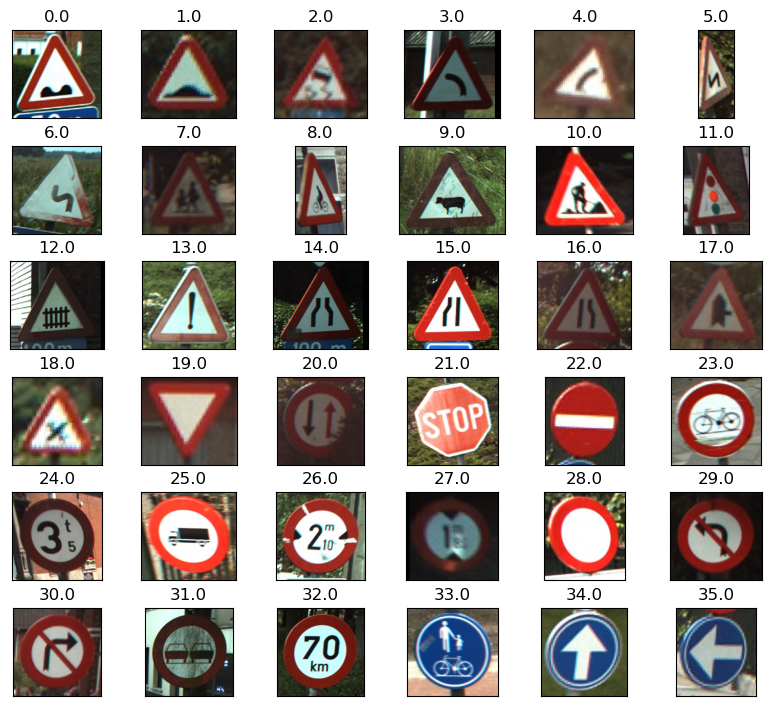

In [11]:
path='../Belgium_Datasets/'
df_unique = df_train.copy().drop_duplicates(subset=["ClassId"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(str(df_unique.Filename[i])))
    ax.set_title(df_unique.ClassId[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [12]:
import cv2
path='../Belgium_Dataset/'
def img_preprocess(df_input):
    X = []
    for img_path in df_input:
        img = cv2.imread(str(img_path))  # yaha pe changes kiya (path+str(img_path)) tha

        if img is None:
            print(f"Image cannot be loaded: {img_path}")
            continue

        img = cv2.resize(img, (30, 30))

        img = img / 255.0

        X.append(img)
    X = np.array(X)
    return X

In [13]:
X=img_preprocess(df_train['Filename'])

In [21]:
y=df_train['ClassId'].to_numpy()

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=42)

In [22]:
X_train.shape

(3672, 30, 30, 3)

In [23]:
from tensorflow.keras.layers import Input, Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten,Dropout, BatchNormalization
from keras.models import Sequential

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(30, 30, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(43, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [39]:
starting_time = time.time()
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,verbose=1)

ending_time = time.time()
total_time = ending_time - starting_time
total_time/=60

print("Time taken fit : ",total_time," min")

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\hp\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\hp\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\hp\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\Users\hp\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\hp\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "C:\Users\hp\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once
      handle._run()
    File "C:\Users\hp\anaconda3\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\hp\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\hp\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\hp\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\hp\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\hp\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\Users\hp\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\hp\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "C:\Users\hp\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "C:\Users\hp\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\hp\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\hp\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\hp\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\hp\AppData\Local\Temp\ipykernel_14876\1189796450.py", line 2, in <module>
      history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,verbose=1)
    File "C:\Users\hp\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\hp\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\hp\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "C:\Users\hp\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\hp\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "C:\Users\hp\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\hp\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
      return self.compiled_loss(
    File "C:\Users\hp\anaconda3\Lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\hp\anaconda3\Lib\site-packages\keras\src\losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\hp\anaconda3\Lib\site-packages\keras\src\losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\hp\anaconda3\Lib\site-packages\keras\src\losses.py", line 2354, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\hp\anaconda3\Lib\site-packages\keras\src\backend.py", line 5762, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 61 which is outside the valid range of [0, 43).  Label values: 32 37 32 31 18 37 12 32 40 22 41 19 37 32 45 39 46 40 61 47 53 38 22 44 61 54 14 22 53 61 28 37
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_21406]

In [18]:
df_test["ClassId"] =df_test["ClassId"].astype(int)
print("Number of Test Images are ", len(df_test))
df_test.dropna()
df_test.head()

Number of Test Images are  12630


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [19]:
X_test = img_preprocess(df_test["Path"])

In [20]:
y_test = df_test["ClassId"].values

In [21]:
y_pred = model.predict(X_test)

In [22]:
y_pred = np.argmax(y_pred, axis=1)

In [23]:
print(y_pred)

[16  1 38 ... 32  7 10]


In [24]:
print(y_test)

[16  1 38 ...  6  7 10]


In [25]:
confusion = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = np.sum(np.diag(confusion)) / np.sum(confusion)
print("Total Accuracy: ", accuracy*100)

# Calculate precision, recall, and F1-score
classification_rep = classification_report(y_test, y_pred, labels=np.unique(y_pred))

# Print the results
print("\nConfusion Matrix:\n", confusion)


lines = classification_rep.split('\n')
data = []

for line in lines[2:-5]:  # Exclude header and footer lines
    row_data = line.split()
    if len(row_data) > 0:
        class_name = row_data[0]
        precision = float(row_data[1])
        recall = float(row_data[2])
        f1_score = float(row_data[3])
        support = int(float(row_data[4]))
        data.append([class_name, precision, recall, f1_score, support])

# Create a DataFrame
report = pd.DataFrame(data, columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])
# Print the DataFrame
print("\n\n\n Summarizing the results : ")
report

Total Accuracy:  96.26286619160729

Confusion Matrix:
 [[ 60   0   0 ...   0   0   0]
 [  1 709   3 ...   1   0   0]
 [  0   3 741 ...   0   0   0]
 ...
 [  0   0   0 ...  87   0   0]
 [  0   0   0 ...   0  48   0]
 [  0   0   0 ...   0   1  86]]



 Summarizing the results : 


,Class,Precision,Recall,F1-Score,Support
0,0,0.91,1.00,0.95,60
1,1,0.96,0.98,0.97,720
2,2,0.96,0.99,0.98,750
3,3,0.91,0.97,0.94,450
4,4,0.99,0.95,0.97,660
5,5,0.97,0.95,0.96,630
6,6,0.99,0.89,0.93,150
7,7,0.97,0.95,0.96,450
8,8,0.96,0.95,0.96,450
9,9,0.97,0.99,0.98,480


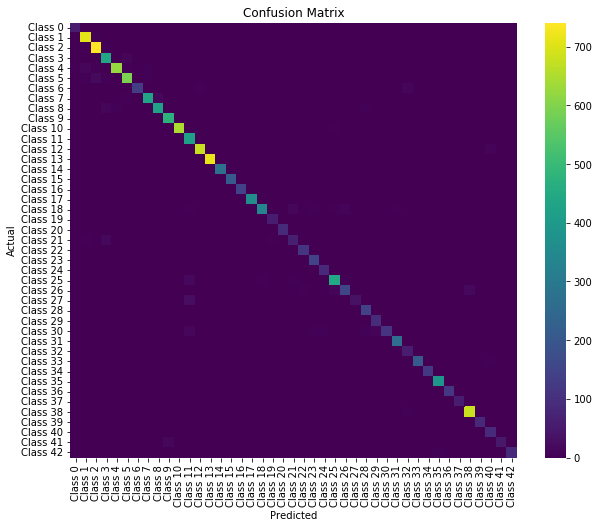

In [26]:
class_names = []
for i in range(num_of_classes):
    class_names.append("Class "+str(i))
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=False, cmap="viridis", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()